* Reformat data for association test analysis
* See if these samples overlap the data we had before
* Do some sanity checks, at least look at the number of calls per genome to see any outliers. 
* Figure out what tissues we should analyze now that we have more data, we can probably expand the list of tissues

RNA seq available for n>=200
482  -->  Muscle - Skeletal
244  -->  Adipose - Visceral (Omentum)
352  -->  Artery - Tibial
206  -->  Testis
206  -->  Stomach
361  -->  Thyroid
357  -->  Esophagus - Mucosa
213  -->  Colon - Transverse
248  -->  Artery - Aorta
203  -->  Pancreas
410  -->  Skin - Sun Exposed (Lower leg)
216  -->  Heart - Atrial Appendage
307  -->  Cells - Transformed fibroblasts
277  -->  Heart - Left Ventricle
457  -->  Whole Blood
353  -->  Nerve - Tibial
385  -->  Adipose - Subcutaneous
287  -->  Esophagus - Muscularis
237  -->  Breast - Mammary Tissue
371  -->  Lung
277  -->  Skin - Not Sun Exposed (Suprapubic)

212 	 Adipose-Visceral(Omentum) 	
312 	 Artery-Tibial 	
295 	 Lung 	
316 	 Adipose-Subcutaneous 	
341 	 Skin-SunExposed(Lowerleg) 	
212 	 Artery-Aorta 	
240 	 Skin-NotSunExposed(Suprapubic) 	
406 	 Muscle-Skeletal 	
249 	 Cells-Transformedfibroblasts 	
289 	 Esophagus-Mucosa 	
239 	 Esophagus-Muscularis 	
303 	 Nerve-Tibial 	
300 	 Thyroid 	
226 	 Heart-LeftVentricle 	
378 	 WholeBlood 	
200 	 Breast-MammaryTissue 	









>Recreate the above list with the new expression file at this path
/storage/resources/datasets/gtex/59533
>for each samples, how many tissues do we have?
>How many sample don't have rnaseq
>Try using the first 2 groups
>Then run the peer analysis after creating the new annotation file (Ensembl -gencode)

phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm.gct.gz


In [1]:
# Libraries
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vcf

VCF='/storage/resources/datasets/gtex/vcfs_650/'
SAMPLES='/storage/resources/datasets/gtex/GTExRunTable.txt'   ##column 33 has sample IDs. fROM this we have hibrid PCR and PCR free
    #650 WGS 
    #588 WXS
    #9798 RNA  from 54 different tissues

In [2]:
runtable = pd.read_csv(SAMPLES, sep='\t', header=0)
#runtable.columns
data = runtable[['Assay_Type','SRA_Sample', 'Run','Sample_Name','body_site', 'data_type','histological_type','analyte_type']]
data['SampleID']=data.Sample_Name.apply(lambda x: '-'.join([x.split('-')[0],x.split('-')[1],x.split('-')[2]]))
data_rna = data.loc[data['Assay_Type']=='RNA-Seq']
data_wgs = data.loc[data['Assay_Type']=='WGS']
data_wes = data.loc[data['Assay_Type']=='WXS']
#Study1_samples = pd.read_csv('/home/szfeupe/scratch/wgs',sep='/t', header=None)[[17,19]]
samplesrun = os.listdir(VCF)
vcfs = [x for x in samplesrun if 'hipstr.vcf.gz' in x and '.tbi' not in x]
run1 = [x.split('_')[0] for x in vcfs]
wgs1 = data_wgs.loc[data_wgs['Run'].isin(run1)]
print('There are ',len(vcfs),' wgs in DIR to be processed')

There are  650  wgs in DIR to be processed


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
##  Tentative merging of the genotypes into one file
i=0
# First file sets the tone
    #  Header
command=["zgrep '^##' "+VCF+vcfs[0] + " > subset_strs.vcf"]
output=subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

    #  INFO column
df = pd.read_csv(VCF+vcfs[0], compression='gzip', header=0, skiprows=int(123), sep='\t', quotechar='"', low_memory=False)
df['#CHROM']=df['#CHROM'].astype(str)
STRs = df[['#CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT']]
print(1)
    # Follow up samples
for file in vcfs:
#    sample=run1[i]
    command=["zgrep '^##' "+VCF+file + " |wc -l"]
    output=subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    (N, err) = output.communicate()
    df = pd.read_csv(VCF+file, compression='gzip', header=0, skiprows=int(N), sep='\t', quotechar='"', low_memory=False)
    df['#CHROM']=df['#CHROM'].astype(str)
    if len(set(list(df['#CHROM'])))<24:
        print(file, ' PASS')
        continue
    del df['INFO']
    del df['QUAL']
    del df['FILTER']
    STRs = pd.merge(STRs,df,how='left', on=['#CHROM','POS','ID','REF','ALT','FORMAT'])
    i+=1
    print(i)
STRs.to_csv("/storage/szfeupe/Runs/650GTEx_estr/Genotypes/STR1", sep='\t',index=None)
STRs

#command=["cat ~/projects/GTEX_eSTRs/650GTEX/Preprocessing_Scripts/subset_strs.vcf STRs > /storage/szfeupe/Runs/650GTEx_estr/Genotypes/AllSamplesSTRs.vcf"]

1
SRR2168805_hipstr.vcf.gz  PASS
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
SRR2157426_hipstr.vcf.gz  PASS
22
23
24
25
26
27
28
SRR2168741_hipstr.vcf.gz  PASS
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GTEX-SSA3-0001,...,GTEX-Y5V5-0002,GTEX-RU1J-0002,GTEX-1B8SG-0003,GTEX-ZXG5-0002,GTEX-139YR-0004,GTEX-U8T8-2026,GTEX-1CAMQ-0003,GTEX-ZVT3-0001,GTEX-UTHO-0003,GTEX-WY7C-0002
0,1,16717,STR_2,GGTGGTGGTGGGGGCGGTGGGGGTGGTG,GGTGGTGGTGGGGGCGGTGGTGGTGCTG,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,NaN,...,.,NaN,NaN,NaN,NaN,0|1:0|0:1.00:0.50:179:0:13:13:136.84|42.16:0|0...,NaN,0|1:0|0:1.00:0.50:114:0:4:17:81.46|32.54:0|0:9...,NaN,NaN
1,1,26454,STR_3,GTGTGTGTGTGT,.,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,.,...,.,NaN,NaN,0|0:0|0:1.00:1.00:101:0:1:0:50.50|50.50:0|0:.:...,.,NaN,NaN,0|0:0|0:1.00:1.00:57:0:0:0:28.50|28.50:0|0:.:0...,NaN,NaN
2,1,28589,STR_4,TTTTTTTTTTTTTTT,TTTGGTTTTTTTTTTTTT,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,.,...,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,30863,STR_5,TCTCCCTCTCTCTCTCTCTCTCTCTCTCTCATTTCTCTCTATCTCA...,TCTCCCTCTCTCTCTCTCTCTCTCTCTCTCATTTCTCTCTATCTCA...,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,31720,STR_6,AAAAAAAAAAAAAA,AAAAAAAAAAAAA,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,0|1:0|-1:1.00:0.50:80:0:11:3:31.70|48.30:0|0:1...,...,0|1:0|-1:1.00:0.50:84:0:5:9:57.18|26.82:0|0:5....,0|1:0|-1:1.00:0.50:66:0:6:5:34.18|31.82:0|0:16...,NaN,0|1:0|-1:1.00:0.50:54:0:5:2:33.58|20.42:0|0:7....,0|1:0|-1:1.00:0.50:47:0:2:1:23.15|23.85:0|0:12...,NaN,0|1:0|-1:1.00:0.50:40:0:8:2:20.55|19.45:0|0:9....,0|1:0|-1:1.00:0.50:52:0:6:1:18.43|33.57:0|0:3....,0|1:0|-1:1.00:0.50:65:0:6:8:35.13|29.87:0|0:10...,0|1:0|-1:1.00:0.50:75:0:7:5:29.20|45.80:0|0:8....
5,1,33450,STR_7,AAAAAAAAAAAAAAA,AAAAAAAAAAAAAA,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,33520,STR_8,GTTTTTTTTTCTTTTTTTTTTT,GATTTTTTTTTTCTTTTTTTTT,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,.,...,0|1:0|0:1.00:0.50:27:0:9:3:13.50|13.50:0|0:81....,0|1:0|0:1.00:0.50:41:0:4:0:16.02|24.98:0|0:112...,0|1:0|0:1.00:0.50:22:0:5:0:8.00|14.00:0|0:29.2...,0|1:0|0:1.00:0.50:46:0:14:1:13.06|32.94:0|0:10...,.,NaN,NaN,NaN,.,NaN
7,1,35484,STR_9,ATAAAAAATAAATAAATAAATAAA,.,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,NaN,...,0|0:0|0:1.00:1.00:34:0:0:3:17.00|17.00:0|0:.:0...,NaN,0|0:0|0:1.00:1.00:31:0:0:1:15.50|15.50:0|0:.:0...,NaN,NaN,NaN,0|0:0|0:1.00:1.00:20:0:0:0:10.00|10.00:0|0:.:0...,NaN,0|0:0|0:1.00:1.00:48:0:0:1:24.00|24.00:0|0:.:0...,NaN
8,1,36352,STR_10,AAAAAAAAAAAAA,AAGAAAAAAAAAA,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,0|1:0|0:1.00:0.50:40:0:7:1:30.97|9.03:0|0:20.3...,...,0|1:0|0:1.00:0.50:35:0:2:1:15.43|19.57:0|0:41....,NaN,NaN,NaN,NaN,NaN,0|1:0|0:1.00:0.50:19:0:5:0:14.56|4.44:0|0:8.42...,NaN,NaN,NaN
9,1,39909,STR_11,AAATAAATAAATAAA,.,.,.,INFRAME_PGEOM=0.95;INFRAME_UP=0.05;INFRAME_DOW...,GT:GB:Q:PQ:DP:DSNP:DSTUTTER:DFLANKINDEL:PDP:PS...,0|0:0|0:1.00:1.00:82:0:0:7:41.00|41.00:0|0:.:0...,...,0|0:0|0:1.00:1.00:67:0:0:2:33.50|33.50:0|0:.:0...,0|0:0|0:1.00:1.00:70:0:0:2:35.00|35.00:0|0:.:0...,0|0:0|0:1.00:1.00:51:0:0:1:25.50|25.50:0|0:.:0...,0|0:0|0:1.00:1.00:52:0:0:0:26.00|26.00:0|0:.:0...,0|0:0|0:1.00:1.00:51:0:0:2:25.50|25.50:0|0:.:0...,0|0:0|0:1.00:1.00:82:0:0:1:41.00|41.00:0|0:.:0...,0|0:0|0:1.00:1.00:56:0:0:0:28.00|28.00:0|0:.:0...,0|0:0|0:1.00:1.00:23:0:0:0:11.50|11.50:0|0:.:0...,0|0:0|0:1.00:1.00:54:0:0:4:27.00|27.00:0|0:.:0...,0|0:0|0:1.00:1.00:43:0:0:3:21.50|21.50:0|0:.:0...


In [10]:
SRR2168805_hipstr.vcf.gz 
SRR2157426_hipstr.vcf.gz
SRR2168741_hipstr.vcf.gz
SRR2165893_hipstr.vcf.gz
SRR2165161_hipstr.vcf.gz
SRR2157404_hipstr.vcf.gz

97

In [15]:
#vcf_reader = vcf.Reader(filename=VCF+file)
#vcf_writer = vcf.Writer(open('/storage/szfeupe/Runs/650GTEx_estr/Genotypes/subset_STRs.vcf', 'w'), vcf_reader)
#STRs.to_csv("/storage/szfeupe/Runs/650GTEx_estr/Genotypes/subset_STRs.vcf", sep='\t', mode='a',index=None)
import vcf
vcf_reader1 = vcf.Reader(open(VCF+file, 'rb'))
vcf_reader2 = vcf.Reader(open(VCF+vcfs[3], 'rb'))
vcf_reader1.samples.append(vcf_reader2.samples[0])

#for record in vcf_reader:   
for record in vcf_reader1:
    record.genotype(vcf_reader1.samples[1])['GT']=record.genotype(vcf_reader2.samples[0])['GT']



KeyError: 'GTEX-U3ZH-0003'

In [11]:
#Sanity checks on the VCFs
Counts=[]
chrcounts={}
vcfs=["SRR2168805_hipstr.vcf.gz","SRR2157426_hipstr.vcf.gz","SRR2168741_hipstr.vcf.gz","SRR2165893_hipstr.vcf.gz","SRR2165161_hipstr.vcf.gz","SRR2157404_hipstr.vcf.gz"]
i=0
for file in vcfs:
    sample=run1[i]
    #STRs = vcf.Reader(filename=VCF+file)
    command=["zgrep '^##' "+VCF+file + " |wc -l"]
    output=subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    (N, err) = output.communicate()
    df = pd.read_csv(VCF+file, compression='gzip', header=0, skiprows=int(N), sep='\t', quotechar='"', low_memory=False)
    df['#CHROM']=df['#CHROM'].astype(str)
    chroms = (list(set(list(df['#CHROM']))))
    if len(set(list(df['#CHROM'])))<24:
        print(i,' ',file, ' --> ',len(set(list(df['#CHROM']))),'chromosmes')
#    if len(list(set(list(df['#CHROM']))))<24:
#        print (file)
#    if len(list(set(list(df['#CHROM']))))>24:
#        print('**',file)
#    print(file, ' --> ',df.shape[0])
    Counts.append(df.shape[0])
    chrcounts[sample]=df.groupby(['#CHROM']).size().reset_index(name='Counts')
    i+=1
       

KeyboardInterrupt: 

In [ ]:
#Number of calls by samples
xvals=[i for i in range(0,len(run1),1)]
print(len(Counts), len(xvals), len(run1))
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bar1 = ax.bar(xvals, Counts, color="blue", edgecolor="white", label="Number of Loci")
ax.set_xticks(xvals)
ax.set_xticklabels(run1, size=10, rotation=80);
ax.set_ylabel("Number of STR genotyped", size=15)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=9);
ax.legend(loc="upper right", frameon=False);
plt.show()



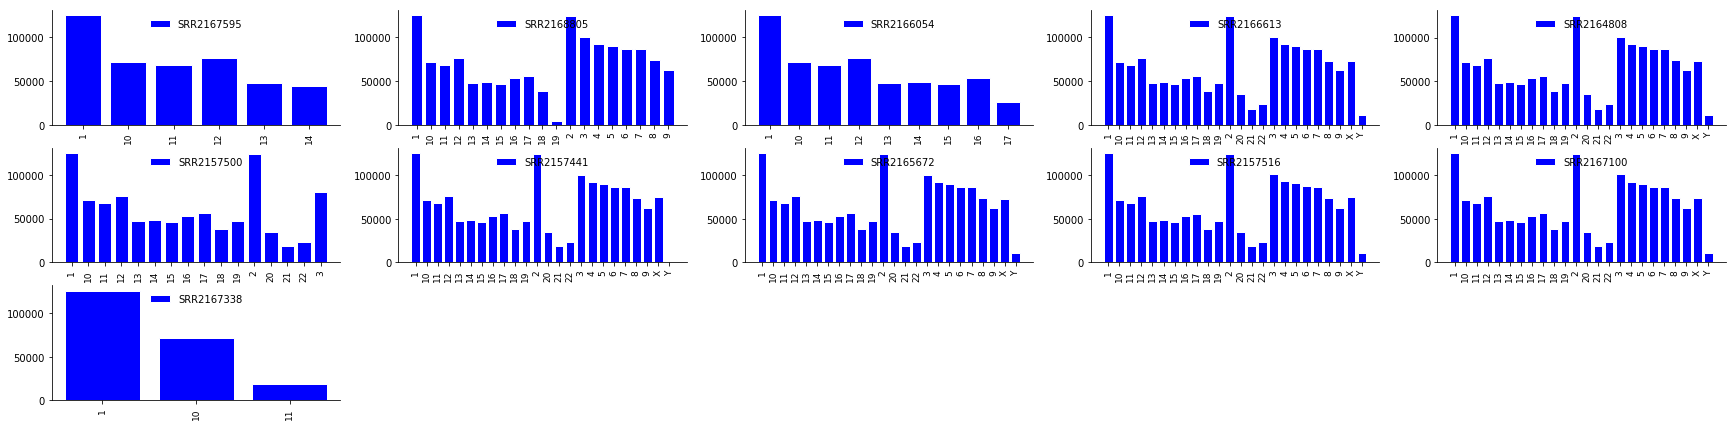

In [13]:
#Calls by chromosomes by samples
fig = plt.figure(1, figsize=(30,30))
m=1; n=1
for samples in run1:
    xvals=[i for i in range(1,chrcounts[samples].shape[0]+1,1)]
    counts=list(chrcounts[samples]['Counts'])
    label=list(chrcounts[samples]['#CHROM'])
    #fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(12,5,n)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    bar1 = ax.bar(xvals, counts, color="blue", edgecolor="white", label=samples)
    ax.set_xticks(xvals)
    ax.set_xticklabels(label, size=9, rotation=90);
    #ax.set_ylabel("Number of STR calls", size=15)
    #ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=9);
    ax.legend(loc="upper center", frameon=False);
    n+=1
    if n>11:
        break
plt.show()    

In [ ]:
Study1_samples = pd.read_csv('/home/szfeupe/scratch/wgs',sep='\t', header=None)
Study1_samples [[17,18,19]]
sct = list(data['SampleID'])
SS  = Study1_samples.18.apply(lambda x: '-'.join([x.split('-')[0],x.split('-')[1],x.split('-')[2]]))

SS

In [5]:
for i in vcfs:
    print (i)

SRR2167595_hipstr.vcf.gz
SRR2168805_hipstr.vcf.gz
SRR2166054_hipstr.vcf.gz
SRR2166613_hipstr.vcf.gz
SRR2164808_hipstr.vcf.gz
SRR2157500_hipstr.vcf.gz
SRR2157441_hipstr.vcf.gz
SRR2165672_hipstr.vcf.gz
SRR2157516_hipstr.vcf.gz
SRR2167100_hipstr.vcf.gz
SRR2167338_hipstr.vcf.gz
SRR2167499_hipstr.vcf.gz
SRR2167011_hipstr.vcf.gz
SRR2164775_hipstr.vcf.gz
SRR2167320_hipstr.vcf.gz
SRR3389804_hipstr.vcf.gz
SRR2155717_hipstr.vcf.gz
SRR2155766_hipstr.vcf.gz
SRR2165245_hipstr.vcf.gz
SRR3439403_hipstr.vcf.gz
SRR2156114_hipstr.vcf.gz
SRR2156276_hipstr.vcf.gz
SRR3478300_hipstr.vcf.gz
SRR2157426_hipstr.vcf.gz
SRR3458561_hipstr.vcf.gz
SRR3478707_hipstr.vcf.gz
SRR2164817_hipstr.vcf.gz
SRR2164784_hipstr.vcf.gz
SRR2164750_hipstr.vcf.gz
SRR2165704_hipstr.vcf.gz
SRR2165148_hipstr.vcf.gz
SRR2168741_hipstr.vcf.gz
SRR3472945_hipstr.vcf.gz
SRR2165707_hipstr.vcf.gz
SRR3478743_hipstr.vcf.gz
SRR2165234_hipstr.vcf.gz
SRR2165675_hipstr.vcf.gz
SRR2167329_hipstr.vcf.gz
SRR3472946_hipstr.vcf.gz
SRR3404019_hipstr.vcf.gz


In [ ]:
As of Dec 19th

chr9 doubles
** SRR2166613_hipstr.vcf.gz
** SRR2167499_hipstr.vcf.gz
** SRR2167320_hipstr.vcf.gz
** SRR3389804_hipstr.vcf.gz
** SRR2155717_hipstr.vcf.gz
** SRR2155766_hipstr.vcf.gz
** SRR3439403_hipstr.vcf.gz
** SRR2156114_hipstr.vcf.gz
** SRR3478300_hipstr.vcf.gz
** SRR3458561_hipstr.vcf.gz
** SRR3478707_hipstr.vcf.gz
** SRR2164750_hipstr.vcf.gz
** SRR3472945_hipstr.vcf.gz
** SRR3478743_hipstr.vcf.gz
** SRR2165234_hipstr.vcf.gz
** SRR2165675_hipstr.vcf.gz
** SRR3472946_hipstr.vcf.gz
** SRR3404019_hipstr.vcf.gz
** SRR3476862_hipstr.vcf.gz
** SRR2166059_hipstr.vcf.gz
** SRR3479304_hipstr.vcf.gz
** SRR3382609_hipstr.vcf.gz
** SRR3395982_hipstr.vcf.gz
** SRR3478791_hipstr.vcf.gz
** SRR2170759_hipstr.vcf.gz
** SRR3481588_hipstr.vcf.gz
** SRR3481362_hipstr.vcf.gz
** SRR3481310_hipstr.vcf.gz
** SRR3478761_hipstr.vcf.gz
** SRR3481457_hipstr.vcf.gz
** SRR3481658_hipstr.vcf.gz
** SRR3478906_hipstr.vcf.gz
** SRR3480749_hipstr.vcf.gz
** SRR3481328_hipstr.vcf.gz
** SRR3478946_hipstr.vcf.gz
** SRR3479273_hipstr.vcf.gz
** SRR3482332_hipstr.vcf.gz
** SRR3479637_hipstr.vcf.gz
** SRR3479641_hipstr.vcf.gz
** SRR3481708_hipstr.vcf.gz
** SRR3479754_hipstr.vcf.gz
** SRR3481309_hipstr.vcf.gz
** SRR3479988_hipstr.vcf.gz
** SRR3481957_hipstr.vcf.gz
** SRR3480312_hipstr.vcf.gz
** SRR3480608_hipstr.vcf.gz
** SRR3482433_hipstr.vcf.gz
** SRR3480647_hipstr.vcf.gz
** SRR3484968_hipstr.vcf.gz
** SRR3480680_hipstr.vcf.gz

Incomplete
SRR2167011_hipstr.vcf.gz
SRR2156276_hipstr.vcf.gz
SRR2157426_hipstr.vcf.gz
SRR2165148_hipstr.vcf.gz
SRR2168741_hipstr.vcf.gz
SRR3382559_hipstr.vcf.gz
SRR3481590_hipstr.vcf.gz
SRR3496118_hipstr.vcf.gz
